# Loan Data From Prosper
## by Lamia Alsalloom

## Preliminary Wrangling

> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.




In [147]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [148]:
# load in the dataset into a pandas dataframe, print statistics
loans = pd.read_csv('prosperLoanData.csv')

In [149]:
# high-level overview of data shape and composition
print(loans.shape)

(113937, 81)


In [150]:
print(loans.dtypes)

ListingKey                              object
ListingNumber                            int64
ListingCreationDate                     object
CreditGrade                             object
Term                                     int64
LoanStatus                              object
ClosedDate                              object
BorrowerAPR                            float64
BorrowerRate                           float64
LenderYield                            float64
EstimatedEffectiveYield                float64
EstimatedLoss                          float64
EstimatedReturn                        float64
ProsperRating (numeric)                float64
ProsperRating (Alpha)                   object
ProsperScore                           float64
ListingCategory (numeric)                int64
BorrowerState                           object
Occupation                              object
EmploymentStatus                        object
EmploymentStatusDuration               float64
IsBorrowerHom

In [151]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [152]:
loans.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


### Potentail Questions
What factors affect a loan’s outcome status?


What affects the borrower’s APR or interest rate?


Are there differences between loans depending on how large the original loan amount was?
### What is the structure of your dataset?

> There are 113,937 loan enteries in the dataset with 81 features. Most variables are numeric in nature.

### What is/are the main feature(s) of interest in your dataset?

> LoanStatus which is The current status of the loan: Cancelled,  Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. I find it to be the most interesting since loans revolve around getting paid.	
> What factors affect a loan’s outcome status?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> LoanStatus, Occupation, IncomeRange, StatedMonthlyIncome, MonthlyLoanPayment, LoanOriginalAmount. these are concluded just by looking at the data, I'm sure after further exploration there will be more.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

> I'll start by looking at the distribution of the main variable of interest: LoanStatus.

In [153]:
status_count = loans.LoanStatus.value_counts()

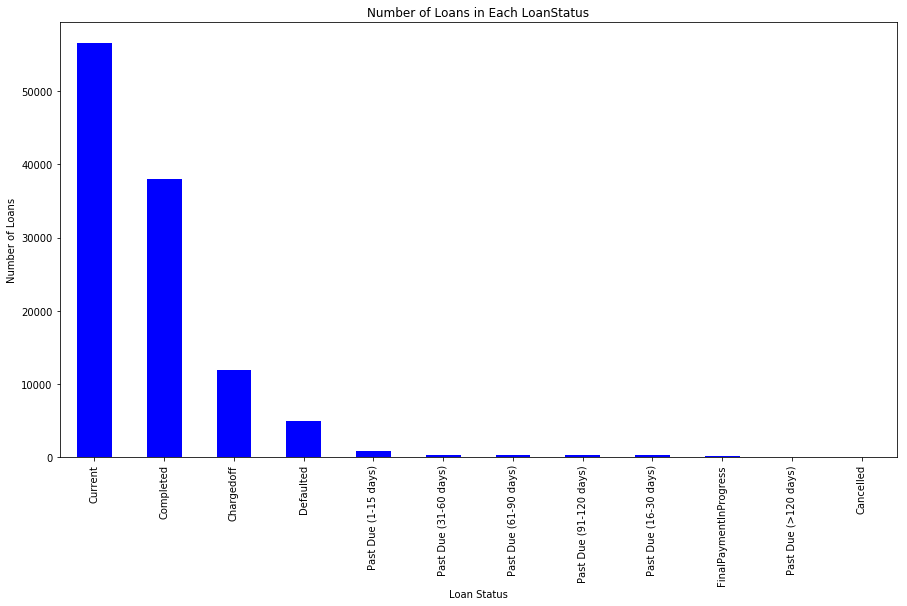

In [154]:
# start with a standard-scaled plot
color = sb.color_palette()[0]

plt.figure(figsize=(15, 8))
status_count.plot(kind='bar', color='b');

plt.title('Number of Loans in Each LoanStatus');
plt.xlabel('Loan Status');
plt.ylabel('Number of Loans');

plt.xticks(rotation=90);

> We can see that most of the loans are either Current or already Completed, we will take a look at loans status that we can get rid of.
> I also want to take a look at the length of loans and see how long they usually take

In [155]:
term_count = loans.Term.value_counts()
term_count

36    87778
60    24545
12     1614
Name: Term, dtype: int64

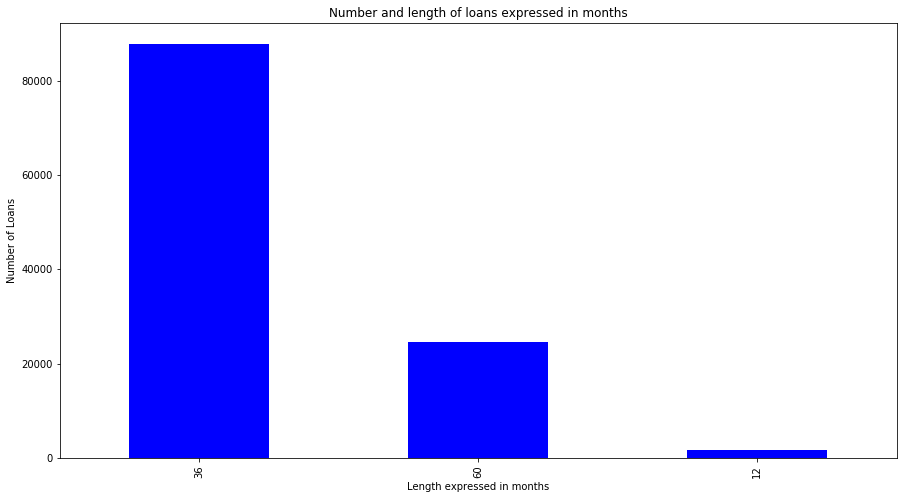

In [156]:
color = sb.color_palette()[0]

plt.figure(figsize=(15, 8))
term_count.plot(kind='bar', color='b');

plt.title('Number and length of loans expressed in months');
plt.xlabel('Length expressed in months');
plt.ylabel('Number of Loans');

plt.xticks(rotation=90);

> We can see that 87778 loans have a length of 36 months, then 24545 loans have a length of 60 months and 1614 loans have a length of 12 months.

> Next I want to take a look at the LoanCategory, see why the borrowers need the money.

> The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans

In [157]:
loans.rename(columns={'ListingCategory (numeric)': 'ListingCategory'}, inplace=True)
cat_count = loans.ListingCategory.value_counts()
cat_count

1     58308
0     16965
7     10494
2      7433
3      7189
6      2572
4      2395
13     1996
15     1522
18      885
14      876
20      771
19      768
5       756
16      304
11      217
8       199
10       91
9        85
12       59
17       52
Name: ListingCategory, dtype: int64

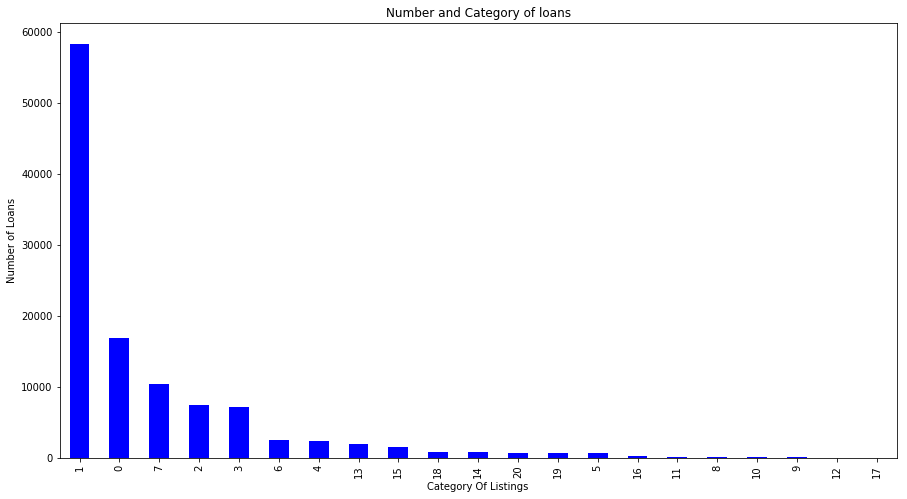

In [158]:
# Since the ListingCategory are numeric we will create a list 
# so the graph can have the proper names

cats = {0:'Not Available', 1:'Debt Consolidation', 2:'Home Improvement', 3:'Business', 4:'Personal Loan', 5:'Student Use', 6:'Auto', 7:'Other', 8:'Baby&Adoption', 9:'Boat', 10:'Cosmetic Procedure',
        11:'Engagement Ring', 12:'Green Loans', 13:'Household Expenses', 14:'Large Purchases', 15:'Medical/Dental', 16:'Motorcycle', 17:'RV', 18:'Taxes', 19:'Vacation', 20:'Wedding Loans'}

loans['ListingCategory'].replace(cats,inplace=True)
# plotting
plt.figure(figsize=(15, 8))
cat_count.plot(kind='bar', color='b');

plt.title('Number and Category of loans');
plt.xlabel('Category Of Listings');
plt.ylabel('Number of Loans');

plt.xticks(rotation=90);




> We can see a huge peak in loan distribution. a huge portion of the loans appear to be Debt Consolidation loans. This is interesting as the number is very high, we can look into it further.

> Next I want to look at the IncomeRange of the borrower.

In [159]:
income_range_count = loans.IncomeRange.value_counts()
income_range_count

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

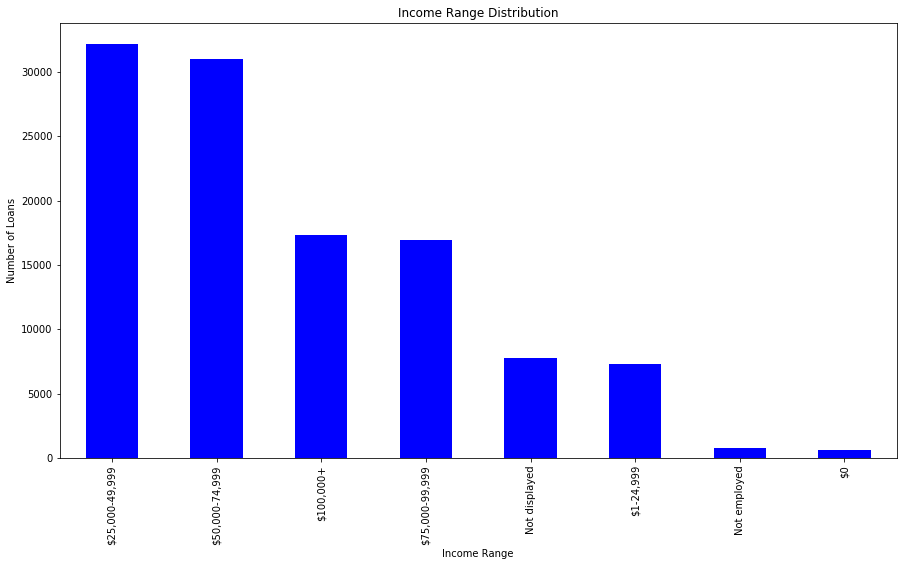

In [160]:
# plotting
plt.figure(figsize=(15, 8))
income_range_count.plot(kind='bar', color='b');

plt.title('Income Range Distribution');
plt.xlabel('Income Range');
plt.ylabel('Number of Loans');

plt.xticks(rotation=90);

> We can break people into groups in here, the first group is of people who have an income that ranges from $25,000-49,999 this group have the biggest number of listings, meaning they take loans and borrow money more than the rest.

> The second group have income that ranges from $50,000-74,999 those are not very diffirent from the first group.

> The third group is for the rich folks who have an income range of $100,000+, they still borrow money but not as much as the first two groups.

> The fourth group is for people who are almost rich, with an income range of $75,000-99,999, their listings are similir to the rich folk

> The last group is for people who have little to no income, or the data was not displayed, as expected their listings are very few cause how else are they gonna pay back the loan.

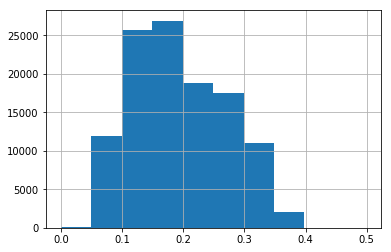

In [161]:
loans.BorrowerRate.hist()

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> First we noticed that a lot of the loans are in the Current status or Completed. After that we found that most of the loans take up to 36 months to be completed, then we found that most of the loans are categorized as Debt Consolidation loans, then finally we looked at the diffirent income ranges.

> I only needed to change the numeric values of the loan category so that i can display meaningful words on the graph.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> There were no unusual distributions and I only needed to change the numeric values of the loan category so that i can display meaningful words on the graph.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. 
# Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### The change of the borrowing rate over the years

In [162]:
# First we will create a column for the year and substring the year from
# ListingCreationDate
loans['Year'] = loans.ListingCreationDate.str.split('-').str[0]
year = loans.Year.value_counts()
year

2013    35413
2012    19556
2007    11557
2011    11442
2008    11263
2014    10734
2006     6213
2010     5530
2009     2206
2005       23
Name: Year, dtype: int64

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


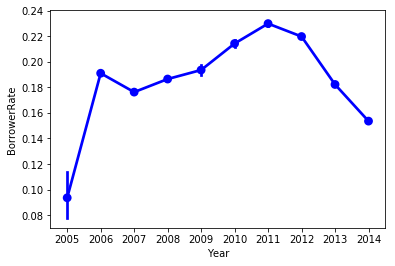

In [163]:
# plotting the pointplot for the Year against BorrowerRate
# Refrence: https://seaborn.pydata.org/generated/seaborn.pointplot.html
sb.pointplot(data=loans, x='Year', y='BorrowerRate', color='b');

> in this pointplot, we can see that rate of borrowers interest spiked up from 2005 to 2006, after that the rate dropped from 2006 to 2007, then the rate constantly kept increasing for the next few years until it reached its highest in 2011 which after that it kept decreasing constantly.


> Based on the documentation of seaborn library: Point plots can be more useful than bar plots for focusing comparisons between different levels of one or more categorical variables. They are particularly adept at showing interactions: how the relationship between levels of one categorical variable changes across levels of a second categorical variable. 



### The Effect of CreditGrade over the LoanStatus

> Next we will look into the CreditGrde, we want to explore how it could effect our LoanStatus.

> CreditGrade: The Credit rating that was assigned at the time the listing went live. Applicable for listings pre-2009 period and will only be populated for those listings. As for the rating of the listings that came after 2009 we look into them using ProsperRating (Alpha) variable.

> ProsperRating (Alpha): The Prosper Rating assigned at the time the listing was created between AA - HR.  Applicable for loans originated after July 2009.

In [164]:
# First we get rid of any NaN values by filling them with ProsperRating (Alpha) assuming they are equivilant
loans['CreditGrade'].fillna(loans['ProsperRating (Alpha)'],inplace = True)

In [165]:
# count the NaN values
loans['CreditGrade'].isna().sum()

131

In [166]:
# see where NaN values come from
loans[loans['CreditGrade'].isna()][['CreditScoreRangeLower', 'CreditScoreRangeUpper']].isna().sum()

CreditScoreRangeLower    0
CreditScoreRangeUpper    0
dtype: int64

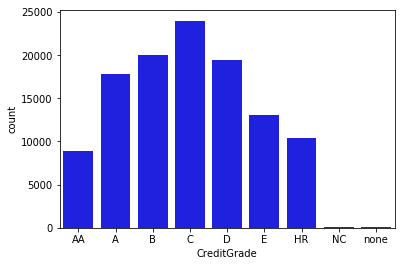

In [167]:
# plot the grades
loans['CreditGrade'].fillna('none',inplace=True)
credit_grades = ['AA','A','B','C','D','E','HR','NC','none']
sb.countplot(x = loans['CreditGrade'],order=credit_grades, color='b')

> we can see that most of the loans have a C credit grade while B and D are similar in the number of loans. This can lead for further exploration.

In [91]:
# we can say that LoanStatus in the FinalPaymentInProgress is the same as Complete 
# we can replace them with one another for easy analysis.
loans['LoanStatus'].replace(to_replace = 'FinalPaymentInProgress', value='Completed',inplace=True)


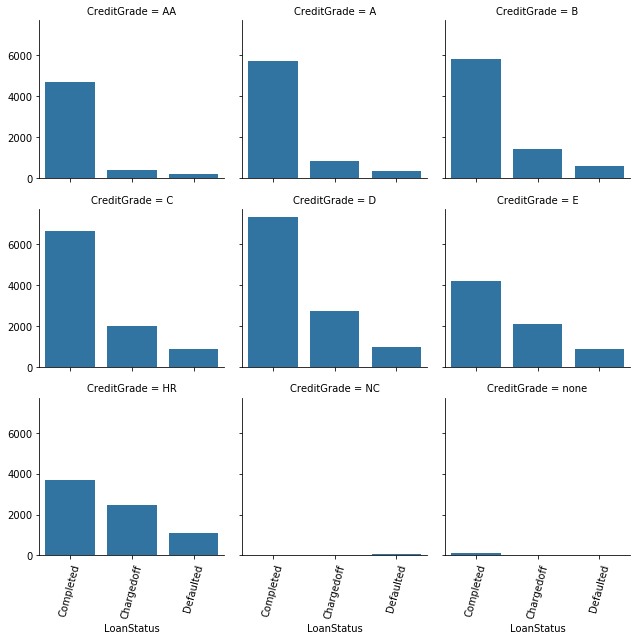

In [97]:
# We will plot to see how the credit grade effects the loan status.
# Refrence: https://seaborn.pydata.org/generated/seaborn.FacetGrid.html
g = sb.FacetGrid(data=loans, col = 'CreditGrade',col_wrap=3,col_order=credit_grades)
plt.xticks(rotation=75)
g.map(sb.countplot,"LoanStatus",order=['Completed','Chargedoff','Defaulted']);
g.set_xticklabels(rotation=75)

> We can see that most of the loans are Completed regardless of the CreditGrade, this is an obvious trend. Maybe we can build off this where we could have a plot of an actual rate..


### How the AvailableBankcardCredit effects that BorrowerRate

> Next we explore the effect of these two variables on each other and see what we can find out.
> AvailableBankcardCredit: The total available credit via bank card at the time the credit profile was pulled.
> BorrowerRate: The Borrower's interest rate for this loan. 

In [102]:
# get rid of null values
loans = loans.loc[loans.AvailableBankcardCredit.notnull()]

Text(0.5, 1.0, 'The Effect of available credit on borrower rate')

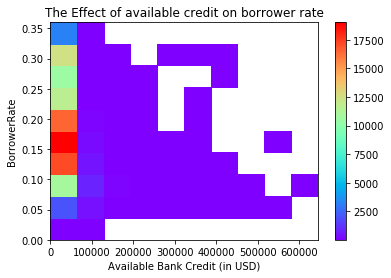

In [108]:
# Refrence: https://www.science-emergence.com/Articles/How-to-create-a-2d-histogram-with-matplotlib-/
plt.hist2d(data=loans, x='AvailableBankcardCredit', y='BorrowerRate', cmap = 'rainbow', cmin = 0.5);
#show the color bar on the side
plt.colorbar()
#set the title and labels
plt.xlabel('Available Bank Credit (in USD)')
plt.ylabel('BorrowerRate')
plt.title('The Effect of available credit on borrower rate')

> We can see that the more credit one has at the bank the less loans needed and therefor less borrower rate at hand.

> 2d histogram plot is used because it's good at seporating values, most of the listings have ranges of values in the AvailableBankcardCredit so we needed a plot that can diffuse, seporate and show.


### The correlation between LoanStatus and BorrowerAPR

> Next we will try to figure out the relationship between loan status and the borrowers APR.

> BorrowerAPR: The Borrower's Annual Percentage Rate (APR) for the loan.

In [75]:
# turn loan status into category
loans['LoanStatus'] = loans['LoanStatus'].astype('category')

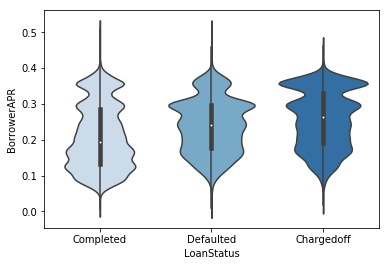

In [98]:
# plot viloin
# Refrence: https://seaborn.pydata.org/generated/seaborn.violinplot.html
sb.violinplot(data=loans, x='LoanStatus' ,y = 'BorrowerAPR', order =['Completed','Defaulted','Chargedoff'], palette="Blues");


> We can see that completed loans have lower Borrowers APR compared to the distribution of defaulted and cahrgedoff loans. This could mean that maybe there is a correlation between the Borrowers APR and the credit grade.


> Based on seaborn documentation: A violin plot shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared. the violin plot features a kernel density estimation of the underlying distribution.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> First the rate of borrowers interest spiked up from 2005 to 2006 then after that kept increasing and dropping with a steady pace over the years. after that we noticed that most of the loans are Completed regardless of the CreditGrade. also we found that completed loans have lower Borrowers APR compared to the rest. Those previous observations indicate that there is   a relationship between the BorrowerAPR and CreditGrade. we can explore this further.
then we saw how having available bank credit reudces the amount for borrowers rate.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> No.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Relationship between the BorrowerAPR and CreditGrade
> In the previous section there was an indication that there is a relationship between the BorrowerAPR and CreditGrade, now we further explore it.

In [126]:
# First, we will generate completion rates for easy analysis.
# we are going to group the data by the CreditGrade then calculate the rate and finally create a df for the generated rates.
group = loans.groupby(['CreditGrade'])
gen_rates = group['LoanStatus'].value_counts() / group['CreditGrade'].count()
gen_rates = gen_rates.reset_index()
#rename the index
gen_rates.rename(columns = {0:'Rate'},inplace=True)
gen_rates2 = gen_rates.copy()

In [127]:
# get rid of none values.
mask = (gen_rates2['CreditGrade'] != 'none')
gen_rates2 = credit_grades.copy()
gen_rates2.remove('none')

In [132]:
gen_rates2

['AA', 'A', 'B', 'C', 'D', 'E', 'HR', 'NC']

In [129]:
# Next we calculate the mean and sem
# get rid of none values.
mask = (loans['CreditGrade'] != 'none')
mean = loans[mask].groupby('CreditGrade')['BorrowerAPR'].mean()
sem = loans[mask].groupby('CreditGrade')['BorrowerAPR'].sem()

In [137]:
# arrange the data
a = []
a_error = []
for i in gen_rates2:
    a.append(mean[i])
    a_error.append(sem[i])

Text(0.5, 1.0, 'Change of Mean BorrowerAPR by CreditGrade')

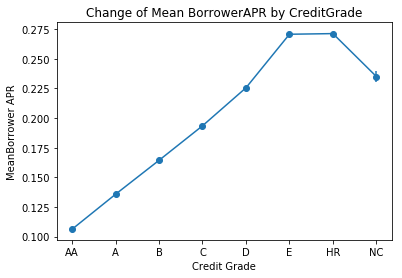

In [168]:
# Refrence: https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/errorbar_limits_simple.html#sphx-glr-gallery-lines-bars-and-markers-errorbar-limits-simple-py
# plot error bar
plt.errorbar(y=a, x=gen_rates2, yerr=a_error, fmt='o-')
plt.xlabel('Credit Grade')
plt.ylabel('MeanBorrower APR');
plt.title('Change of Mean BorrowerAPR by CreditGrade')

> We can see that there is relationship between the BorrowerAPR and CreditGrade, the borrowers APR decreases for listings with no credit, which makes sense.


### Do Homeowners and Non-Homeowners have a variant BorrowerRate over the years 

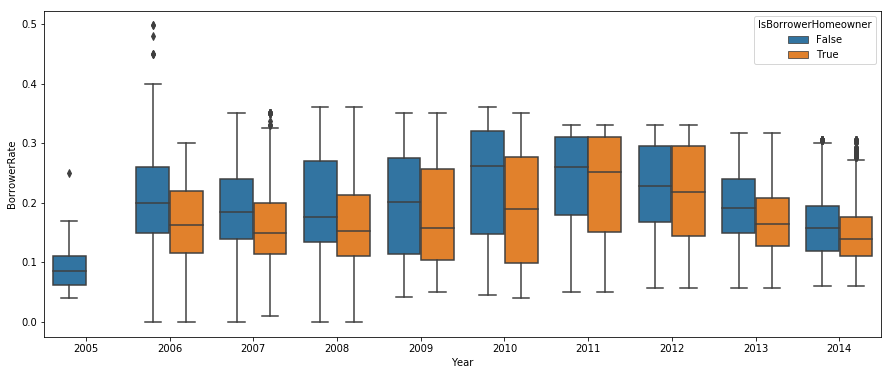

In [144]:
# plots the boxplot 
#Refrence: https://seaborn.pydata.org/generated/seaborn.boxplot.html
g = sb.boxplot(data=loans, x='Year', y='BorrowerRate', hue='IsBorrowerHomeowner');
g.figure.set_figwidth(15)
g.figure.set_figheight(6)

> We can see that the borrowers rate has increased over some years in case of non-homeowners then it kept decreasing in 2010. And when we look at homeowners it kept a steady pace until after 2009 it kept increasing until 2011 then started to decrease.


### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> I extended my investigation on the relationship between the BorrowerAPR and CreditGrade in this section by looking at the impact of they had on each other. The multivariate exploration here showed that the borrowers APR decreases for listings with no credit. We also noticed that the borrowers rate has increased over some years in case of non-homeowners then it kept decreasing in 2010. And when we look at homeowners it kept a steady pace until after 2009 it kept increasing until 2011 then started to decrease.


### Were there any interesting or surprising interactions between features?

> no.

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!